# Assignment 1
This jupyter notebook is meant to be used in conjunction with the full questions in the assignment pdf.

## Instructions
- Write your code and analyses in the indicated cells.
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Do not attempt to change the contents of the other cells.

## Submission
- Ensure that this notebook runs without errors when the cells are run in sequence.
- Rename the notebook to `<roll_number>.ipynb` and submit ONLY the notebook file on moodle.

### Environment setup

The following code reads the train and test data (provided along with this template) and outputs the data and labels as numpy arrays. Use these variables in your code.

---
#### Note on conventions
In mathematical notation, the convention is tha data matrices are column-indexed, which means that a input data $x$ has shape $[d, n]$, where $d$ is the number of dimensions and $n$ is the number of data points, respectively.

Programming languages have a slightly different convention. Data matrices are of shape $[n, d]$. This has the benefit of being able to access the ith data point as a simple `data[i]`.

What this means is that you need to be careful about your handling of matrix dimensions. For example, while the covariance matrix (of shape $[d,d]$) for input data $x$ is calculated as $(x-u)(x-u)^T$, while programming you would do $(x-u)^T(x-u)$ to get the correct output shapes.

In [19]:
from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt

def read_data(filename):
    with open(filename, 'r') as f:
        lines = f.readlines()
    
    num_points = len(lines)
    dim_points = 28 * 28
    data = np.empty((num_points, dim_points))
    labels = np.empty(num_points)
    
    for ind, line in enumerate(lines):
        num = line.split(',')
        labels[ind] = int(num[0])
        data[ind] = [ int(x) for x in num[1:] ]
        
    return (data, labels)

train_data, train_labels = read_data("sample_train.csv")
test_data, test_labels = read_data("sample_test.csv")
print(train_data.shape, test_data.shape)
print(train_labels.shape, test_labels.shape)

(6000, 784) (1000, 784)
(6000,) (1000,)


# Questions
---
## 1.3.1 Representation
The next code cells, when run, should plot the eigen value spectrum of the covariance matrices corresponding to the mentioned samples. Normalize the eigen value spectrum and only show the first 100 values.

(1, 784) (600, 784) (784, 784)


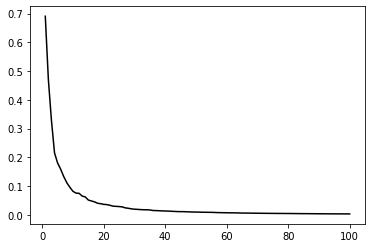

In [2]:
# Samples corresponding to the last digit of your roll number (plot a)
import math

roll_no = 7.0
roll_data = []
i = 0
for label in train_labels:
    if label == roll_no:
        roll_data.append(train_data[i])
    i += 1
roll_data = np.asarray(roll_data)

mean = np.mean(roll_data, axis=0)
mean = mean.reshape(1,784)
roll_data = roll_data - mean
cov_mat = ((roll_data.T).dot(roll_data))

print(mean.shape, roll_data.shape, cov_mat.shape)

eigenvectors, eigenvalues, V = np.linalg.svd(cov_mat, full_matrices=False)
eigenvalues = eigenvalues.reshape(eigenvalues.shape[0],1)
norm_constant = math.sqrt(np.sum((eigenvalues.T).dot(eigenvalues)))

norm_eigvalues = [i/norm_constant for i in eigenvalues]
X_axis = np.linspace(1,100, 100)
plt.plot(X_axis, norm_eigvalues[0:100], color = 'black')
plt.show()

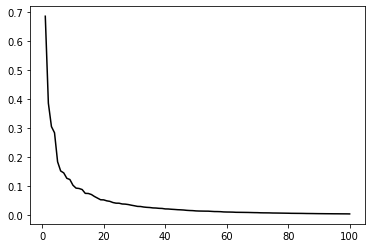

In [3]:
# Samples corresponding to the last digit of (your roll number + 1) % 10 (plot b)

roll_no = 8.0
roll_data = []
i = 0
for label in train_labels:
    if label == roll_no:
        roll_data.append(train_data[i])
    i += 1
roll_data = np.asarray(roll_data)

mean = np.mean(roll_data, axis=0)
mean = mean.reshape(1,784)
roll_data = roll_data - mean
cov_mat = ((roll_data.T).dot(roll_data))

eigenvectors, eigenvalues, V = np.linalg.svd(cov_mat, full_matrices=False)
eigenvalues = eigenvalues.reshape(eigenvalues.shape[0],1)
norm_constant = math.sqrt(np.sum((eigenvalues.T).dot(eigenvalues)))

norm_eigvalues = [i/norm_constant for i in eigenvalues]
X_axis = np.linspace(1,100, 100)
plt.plot(X_axis, norm_eigvalues[0:100], color = 'black')
plt.show()

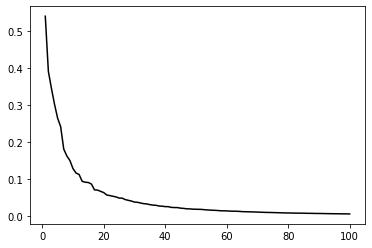

In [90]:
# All training data (plot c)

mean = np.mean(train_data, axis=0)
mean = mean.reshape(1,784)
temp_train_data = train_data - mean
cov_mat = ((temp_train_data.T).dot(temp_train_data))

eigenvectors, eigenvalues, V = np.linalg.svd(cov_mat, full_matrices=False)
eigenvalues = eigenvalues.reshape(eigenvalues.shape[0],1)
norm_constant = math.sqrt(np.sum((eigenvalues.T).dot(eigenvalues)))

norm_eigvalues = [i/norm_constant for i in eigenvalues]
X_axis = np.linspace(1,100, 100)
plt.plot(X_axis, norm_eigvalues[0:100], color = 'black')
plt.show()

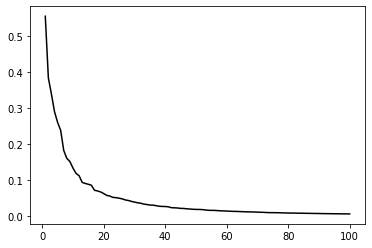

In [67]:
# Randomly selected 50% of the training data (plot d)

random_data = []
indices_store = []
i = 0
while len(random_data)< 0.5*len(train_data):
    index = np.random.randint(len(train_data))
    if index not in indices_store:
        random_data.append(train_data[index])
        indices_store.append(index)
    
random_data = np.asarray(random_data)

mean = np.mean(random_data, axis=0)
mean = mean.reshape(1,784)
random_data = random_data - mean
cov_mat = ((random_data.T).dot(random_data))

eigenvectors, eigenvalues, V = np.linalg.svd(cov_mat, full_matrices=False)
eigenvalues = eigenvalues.reshape(eigenvalues.shape[0],1)
norm_constant = math.sqrt(np.sum((eigenvalues.T).dot(eigenvalues)))

norm_eigvalues = [i/norm_constant for i in eigenvalues]
X_axis = np.linspace(1,100, 100)
plt.plot(X_axis, norm_eigvalues[0:100], color = 'black')
plt.show()

### 1.3.1 Question 1
- Are plots a and b different? Why?
- Are plots b and c different? Why?
- What are the approximate ranks of each plot?

---
Your answers here (double click to edit)


1. Plots a and b are not exactly same bit differet. For a 28 * 28 gray scale image have the 784 features, so we got the 784 eigen vectors and eigen values for each image. We are plotting the graph for first 100 eigen vectors. In plot a considered the features of label = 2.0 and in plot b considered the label = 4.0. So the feature values of both these labels different. By that we'll get different features. So both plots different.

2.  Both plots are different. In plot b i have considered the only single label = 4.0 data but in plot c, considered the entire training data set. So in plot c obtained the different eigen vectors of different features of different labels. Actually plot b data subset of plot c data but the features values are different. So we'll get different plots.

3.  Approximate Rank of plot a is 544 and Actual rank is 520 Approximate Rank of plot b is 535 and Actual rank is 497 Approximate Rank of plot c is 667 and Actual rank is 658 Approximate Rank of plot d is 643 and Actual rank is 624


---

### 1.3.1 Question 2
- How many possible images could there be?
- What percentage is accessible to us as MNIST data?
- If we had acces to all the data, how would the eigen value spectrum of the covariance matrix look?

---
1. Each sample is in R^784 with elements in {0, 1} so will get 2^784 combination of possible images.
2. The percentage of available data is 6000/2^784. This is nearly equal to 0, yet we are able to achieve such high accuracies with our models.
3. We would arrive at a horizontal line as all eigenvectors would have equal weight (eigenvector). There is no bias in the data as the data takes all possible values. This lack of bias is why all dimensions have equal priority.
---

## 1.3.2 Linear Transformation
---
### 1.3.2 Question 1
How does the eigen spectrum change if the original data was multiplied by an orthonormal matrix? Answer analytically and then also validate experimentally.

---
The spectrum would straighten as we project the data onto linearly independent vectors (orthonormal basis).
This linear independence does not exist within the attributes of the given data.

The basis helps us store higher information in lesser dimensions.
Hence, in comparison, the more important eigenvectors have higher eigenValues.

---

0.5399960883137671 0.5399960883137672  is not equal spectra
0.39088113901172006 0.3908811390117199  is not equal spectra
0.3447191661324944 0.34471916613249415  is not equal spectra
0.3018512141302798 0.30185121413027977  is not equal spectra
0.24124631769496338 0.24124631769496388  is not equal spectra
0.18065015053965713 0.18065015053965716  is not equal spectra
0.11586660402313735 0.1158666040231374  is not equal spectra
0.11191567447683844 0.11191567447683841  is not equal spectra
0.09340312457568357 0.09340312457568363  is not equal spectra
0.09100803894753738 0.09100803894753745  is not equal spectra
0.09025758232147771 0.09025758232147765  is not equal spectra
0.08603138065385539 0.08603138065385535  is not equal spectra
0.07031859871731888 0.07031859871731895  is not equal spectra
0.06966670944350699 0.06966670944350697  is not equal spectra
0.0663333251847274 0.06633332518472741  is not equal spectra
0.0630042293610987 0.06300422936109877  is not equal spectra
0.05642443603743

6.7020038198740295e-06 6.702003819871634e-06  is not equal spectra
6.581119503319395e-06 6.58111950331732e-06  is not equal spectra
6.32412334964481e-06 6.324123349632648e-06  is not equal spectra
5.910590502359725e-06 5.91059050235717e-06  is not equal spectra
5.834528286600833e-06 5.8345282866012715e-06  is not equal spectra
5.306139162855294e-06 5.306139162855264e-06  is not equal spectra
5.199908488273607e-06 5.199908488273561e-06  is not equal spectra
5.081108608587236e-06 5.0811086085865985e-06  is not equal spectra
4.801066051285234e-06 4.80106605128537e-06  is not equal spectra
4.42958031635493e-06 4.429580316354541e-06  is not equal spectra
4.2642049024805014e-06 4.2642049024795705e-06  is not equal spectra
4.119841037308832e-06 4.119841037309177e-06  is not equal spectra
3.909351022468428e-06 3.909351022466956e-06  is not equal spectra
3.479999572893864e-06 3.479999572887365e-06  is not equal spectra
3.441055572427861e-06 3.441055572427468e-06  is not equal spectra
2.77134530

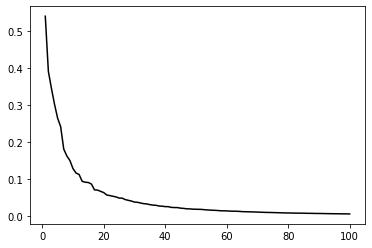

In [99]:
# Experimental validation here.
# Multiply your data (train_data) with an orthonormal matrix and plot the
# eigen value specturm of the new covariance matrix.


### Generate the orthonormal matrix in numpy.
from scipy.stats import ortho_group

ortho_matrix = ortho_group.rvs(784)
transformed_data = train_data.dot(ortho_matrix)


mean = np.mean(transformed_data, axis=0)
mean = mean.reshape(1,784)
transformed_data = transformed_data - mean
cov_mat = ((transformed_data.T).dot(transformed_data))

eigenvectors, eigenvalues, V = np.linalg.svd(cov_mat, full_matrices=False)
eigenvalues = eigenvalues.reshape(eigenvalues.shape[0],1)
norm_constant = math.sqrt(np.sum((eigenvalues.T).dot(eigenvalues)))

norm_eigvalues1 = [i/norm_constant for i in eigenvalues]
X_axis = np.linspace(1,100, 100)
# fig = plt.figure()
# two_plots = fig.add_subplot(121)
# two_plots.plot(X_axis, norm_eigvalues[0:100], color = 'black')
plt.plot(X_axis, norm_eigvalues1[0:100], color = 'black')

# for i in range(len(norm_eigvalues)):
#     if norm_eigvalues[i][0]!=norm_eigvalues1[i][0]:
#         print(norm_eigvalues[i][0],norm_eigvalues1[i][0], " is not equal spectra")

plt.show()



### 1.3.2 Question 2
If  samples  were  multiplied  by  784 × 784  matrix  of rank 1 or 2, (rank deficient matrices), how will the eigen spectrum look like?

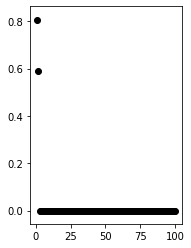

In [53]:
ortho_vector = ortho_matrix[0:2].reshape([784,2])
rankless_matrix = ortho_vector.dot(ortho_vector.T)
# print(rankless_matrix.shape, ortho_matrix[0].shape)
# print(np.linalg.matrix_rank(rankless_matrix))

transformed_rankless_data = train_data.dot(rankless_matrix)
mean = np.mean(transformed_rankless_data, axis=0)
mean = mean.reshape(1,784)
transformed_rankless_data = transformed_rankless_data - mean
cov_mat = ((transformed_rankless_data.T).dot(transformed_rankless_data))

eigenvectors, eigenvalues, V = np.linalg.svd(cov_mat, full_matrices=False)
eigenvalues = eigenvalues.reshape(eigenvalues.shape[0],1)
norm_constant = math.sqrt(np.sum((eigenvalues.T).dot(eigenvalues)))

norm_eigvalues = [i/norm_constant for i in eigenvalues]
X_axis = np.linspace(1,100, 100)
fig = plt.figure()
two_plots = fig.add_subplot(122)
two_plots.scatter(X_axis, norm_eigvalues[0:100], color = 'black')

plt.show()


The rank of the matrix defines the number of non-zero eigen values. 
If we multiply rank deficient matrix with training data, getting first k(k is rank of rank deficient matrix) eigen vectors plot in decreasing order and remaing eigen vectors spectrum is straight line.
The graph tends towards a right angle as we project the training data onto lesser dimensions, i.e., by multiplying with rank deficient matrices.


### 1.3.2 Question 3
Project the original data into the first and second eigenvectors and plot in 2D

(6000, 2)


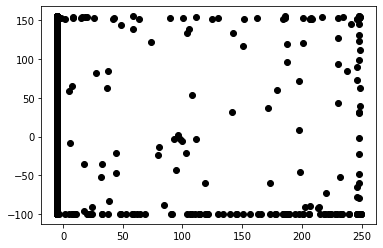

In [7]:
# Plotting code here

mean = np.mean(train_data, axis=0)
mean = mean.reshape(1,784)
temp_train_data = train_data - mean
cov_mat = ((temp_train_data.T).dot(temp_train_data))

eigenvectors, eigenvalues, V = np.linalg.svd(cov_mat, full_matrices=False)
eigenvalues = eigenvalues.reshape(eigenvalues.shape[0],1)
norm_constant = math.sqrt(np.sum((eigenvalues.T).dot(eigenvalues)))

# Projecting
projected_data = temp_train_data.dot(eigenvectors[0:2,:].reshape([784,2]))
print(projected_data.shape)
# norm_eigvalues = [i/norm_constant for i in eigenvalues]
# X_axis = np.linspace(1,100, 100)
plt.scatter(projected_data[:,:1],projected_data[:,1:] , color = 'black')
plt.show()


## 1.3.3 Probabilistic View
---
In this section you will classify the test set by fitting multivariate gaussians on the train set, with different choices for decision boundaries. On running, your code should print the accuracy on your test set.

In [61]:
# Print accuracy on the test set using MLE
# indices_1 = train_data[np.nonzero(train_labels == 1)]
# for row in indices_1:
#    print(np.where(np.all(train_data==row,axis=1)))

def pdf_singular_case(x,m,V,k,D):
    #  ((2π)k|D|)−1/2exp(−Q(x)/2)
    Qx = (x-m)*np.linalg.inv(V)*(x-m)
    pd = pow(pow((2*np.pi),k)*np.linalg.det(D),-(1/2))* pow(np.e,-Qx/2)
    
    return pd

#Multivariate Gaussian Distribution
def multivariate_gaussian_dist(item, V_inv,log_det):
    k = 450 # Rank of matrix
    item = item.reshape(784,1)
    mgd = ((-k/2)*np.log(2*(np.pi))*log_det)-((np.matmul(np.matmul(item.T, V_inv), item))/2)
    return mgd


def get_log_det(eigenvalues):
    zero_vec = np.zeros([1,784])
    count = 0
    full_rank_cov_mat = np.empty([0,784])
    non_zero_eigenvalues = np.empty([0])
    # Reducing the p eigenvectors of dim p, to k eigen.Vecs of dim p.
    for i in range(784):
        # We take 1 as eigen-values very close to 0 need to be ignored. The rank is also satisfied when we take this condition.
        if eigenvalues[i]>1:
            non_zero_eigenvalues = np.append(non_zero_eigenvalues,eigenvalues[i])
            full_rank_cov_mat = np.append(full_rank_cov_mat,eigenvectors[i].reshape(1,784),axis=0)

#     print(non_zero_eigenvalues.shape)
    D = np.diag(non_zero_eigenvalues)
    log_det = 0
    for eigenval in non_zero_eigenvalues:
        log_det += np.log(eigenval)
    
    V = full_rank_cov_mat.T.dot(D.dot(full_rank_cov_mat))
    V_inv = np.linalg.pinv(cov_mat)
    
    return log_det, V_inv


max_likelihood = np.zeros(shape=(1000,10))
for j in range(10):
    class_label=float(j)
    each_class_data = train_data[np.nonzero(train_labels == class_label)]
    cov_mat = np.cov(each_class_data.T)
    cov_mat_inv = np.linalg.pinv(cov_mat)
    each_class_mean = np.mean(each_class_data, axis=0)
    eigenvectors, eigenvalues, V = np.linalg.svd(cov_mat, full_matrices=False)
    eigenvalues = eigenvalues.reshape(eigenvalues.shape[0],1)
    norm_constant = math.sqrt(np.sum((eigenvalues.T).dot(eigenvalues)))
    
    log_det, V_inv = get_log_det(eigenvalues)
#     print(log_det, V_inv.shape)
    for k in range(len(test_data)):
        multivariate_dist = multivariate_gaussian_dist(test_data[k]-each_class_mean, V_inv, log_det)
        max_likelihood[k][j] = multivariate_dist

max_likelihood_indices = np.unravel_index(np.argmax(max_likelihood, axis=1), max_likelihood.shape)
count = 0
for i in range(len(test_data)):
    if(test_labels[i]==max_likelihood_indices[1][i]):
        count+=1
print("Accuracy of MLE: ", (count/1000)*100, "%")

Accuracy of MLE:  42.0 %


In [79]:
# Print accuracy on the test set using MAP
# (assume a reasonable prior and mention it in the comments)

def prior_prob(cov_mat, class_mean):
    '''
        There are equal number of training samples for each class.
        Hence, we take 600/6000 to be the prior for every class
    '''
    return 1/10
    

max_a_posterior = np.zeros(shape=(1000,10))
cov_mat = np.cov(train_data)
for j in range(10):
    class_label=float(j)
    each_class_data = train_data[np.nonzero(train_labels == class_label)]
    cov_mat = np.cov(each_class_data.T)
    cov_mat_inv = np.linalg.pinv(cov_mat)
    each_class_mean = np.mean(each_class_data, axis=0)
    
    eigenvectors, eigenvalues, V = np.linalg.svd(cov_mat, full_matrices=False)
    eigenvalues = eigenvalues.reshape(eigenvalues.shape[0],1)
    norm_constant = math.sqrt(np.sum((eigenvalues.T).dot(eigenvalues)))
    
    log_det, V_inv = get_log_det(eigenvalues)
    
    for k in range(len(test_data)):
        multivariate_dist = multivariate_gaussian_dist(test_data[k]-each_class_mean, V_inv,log_det)
        max_a_posterior[k][j] = multivariate_dist*prior_prob(cov_mat, each_class_mean)

max_a_posterior_indices = np.unravel_index(np.argmax(max_a_posterior, axis=1), max_likelihood.shape)
count = 0
for i in range(len(test_data)):
    if(test_labels[i]==max_a_posterior_indices[1][i]):
        count+=1
print("Accuracy of MAP: ", (count/1000)*100, "%")

Accuracy of MAP:  42.0 %


In [ ]:
# Print accuracy using Bayesian pairwise majority voting method

from itertools import combinations 

def covariance_calculate(comb):
    cov_and_inv_matrices = {}
    for c in list(comb):
        class_1 = train_data[np.nonzero(train_labels == float(c[0]))]
        class1_cov_mat = np.cov(class_1.T)
        class_2 = train_data[np.nonzero(train_labels == float(c[1]))]
        class2_cov_mat = np.cov(class_2.T)
        cov_mat = (class1_cov_mat + class2_cov_mat)/2
        inv_cov_mat = np.linalg.pinv(cov_mat)
        cov_and_inv_matrices[c]=[cov_mat, inv_cov_mat]
    return cov_and_inv_matrices

labels = list(range(0,10))
comb = combinations(labels, 2)        #10C2 combination of pairs for each sample
covriance_inv_matrices = covariance_calculate(combinations(labels, 2))
count = 0
print("Please wait, it takes 2 to 3 minutes")
for i in range(len(test_labels)):
    predicted_labels =[]
    for c in list(combinations(labels, 2)):
        class_1 = train_data[np.nonzero(train_labels == float(c[0]))]
        class_2 = train_data[np.nonzero(train_labels == float(c[1]))]
        class_1_mean = np.mean(class_1, axis=0)
        class_2_mean = np.mean(class_2, axis=0)
        
        eigenvectors, eigenvalues, V = np.linalg.svd(covriance_inv_matrices[c][0]-class_1_mean, full_matrices=False)
        eigenvalues = eigenvalues.reshape(eigenvalues.shape[0],1)
        norm_constant = math.sqrt(np.sum((eigenvalues.T).dot(eigenvalues)))

        log_det1, V_inv1 = get_log_det(eigenvalues)
        
        eigenvectors, eigenvalues, V = np.linalg.svd(covriance_inv_matrices[c][0]-class_2_mean, full_matrices=False)
        eigenvalues = eigenvalues.reshape(eigenvalues.shape[0],1)
        norm_constant = math.sqrt(np.sum((eigenvalues.T).dot(eigenvalues)))

        log_det2, V_inv2 = get_log_det(eigenvalues)
        
        bayesian_pairwise_voting1 = multivariate_gaussian_dist(test_data[i]-class_1_mean, V_inv1, log_det1)
        bayesian_pairwise_voting2 = multivariate_gaussian_dist(test_data[i]-class_2_mean, V_inv2, log_det2)
        if((bayesian_pairwise_voting1*(class_1.shape[0]/train_data.shape[0])) >= (bayesian_pairwise_voting2*(class_2.shape[0]/train_data.shape[0]))):
            predicted_labels.append(float(c[0]))
        else:
            predicted_labels.append(float(c[1]))
    pred_label = max(predicted_labels,key=predicted_labels.count)
    true_label = test_labels[i]
    if(pred_label==true_label):
        count+=1
print("Accuracy using Bayesian pairwise majority voting method is ",(count/1000)*100,"%")

In [ ]:
# Print accuracy using Simple Perpendicular Bisector majority voting method

def Perpendicular_Bisector(comb):
    class_means_inv_covmat = {}
    for c in list(comb):
        class_1 = train_data[np.nonzero(train_labels == float(c[0]))]
        class1_cov_mat = np.cov(class_1.T)
        class_1_mean = np.mean(class_1, axis=0)
        class_2 = train_data[np.nonzero(train_labels == float(c[1]))]
        class2_cov_mat = np.cov(class_2.T)
        class_2_mean = np.mean(class_2, axis=0)
        perp_bisec_mean = (class_1_mean + class_2_mean)/2
        inv_cov_mat1 = np.linalg.pinv(class1_cov_mat)
        inv_cov_mat2 = np.linalg.pinv(class2_cov_mat)
        class_means_inv_covmat[c]=[perp_bisec_mean, inv_cov_mat1, inv_cov_mat2]
    return perp_bisec_mean, class_means_inv_covmat

labels = list(range(0,10))
comb = combinations(labels, 2)        #10C2 combination of pairs for each sample
perp_bisec_mean, class_means_inv_covmats = Perpendicular_Bisector(combinations(labels, 2))
count = 0
print("Please wait, it takes 2 to 3 minutes")
for i in range(len(test_labels)):
    predicted_labels =[]
    for c in list(combinations(labels, 2)):
        class_1 = train_data[np.nonzero(train_labels == float(c[0]))]
        class_2 = train_data[np.nonzero(train_labels == float(c[1]))]
        
        cov_mat_1 = np.cov(class_1.T)
        cov_mat_2 = np.cov(class_2.T)
        eigenvectors, eigenvalues, V = np.linalg.svd(cov_mat_1-perp_bisec_mean, full_matrices=False)
        eigenvalues = eigenvalues.reshape(eigenvalues.shape[0],1)
        norm_constant = math.sqrt(np.sum((eigenvalues.T).dot(eigenvalues)))

        log_det1, V_inv1 = get_log_det(eigenvalues)
        
        eigenvectors, eigenvalues, V = np.linalg.svd(cov_mat_2-perp_bisec_mean, full_matrices=False)
        eigenvalues = eigenvalues.reshape(eigenvalues.shape[0],1)
        norm_constant = math.sqrt(np.sum((eigenvalues.T).dot(eigenvalues)))

        log_det2, V_inv2 = get_log_det(eigenvalues)
        
        perp_bisec_voting1 = multivariate_gaussian_dist(test_data[i]-class_means_inv_covmats[c][0], V_inv, log_det)
        perp_bisec_voting2 = multivariate_gaussian_dist(test_data[i]-class_means_inv_covmats[c][0], V_inv, log_det)
        if((perp_bisec_voting1*(class_1.shape[0]/train_data.shape[0])) >= (perp_bisec_voting2*(class_2.shape[0]/train_data.shape[0]))):
            predicted_labels.append(float(c[0]))
        else:
            predicted_labels.append(float(c[1]))
    pred_label = max(predicted_labels,key=predicted_labels.count)
    true_label = test_labels[i]
    if(pred_label==true_label):
        count+=1
print("Accuracy using Bayesian pairwise majority voting method is ",(count/1000)*100,"%")

### 1.3.3 Question 4
Compare performances and salient observations

In Maximum likelihood estimation(MLE) we are calculating likelihood Prob(w_i|x) of each class. Multiplying test sample with each class likelihood probability. From that finding out the maximum likelihood class.

In Maximum a posteriori(MAP) estimation calculating the likelihood probability P(w_i|x) and prior probability P(w_i) for each class. but posteriori probability for each class is same so here MLE == MAP.

In Bayesian pairwise majority voting method, we calculate the average coveraince matrix for each pair of classes. We get 10C2 = 45 combinations. Because of this 45 combinations each class MAP is compared with remaining all classes. This method gives us the highest accuracy.

In Simple Perpendicular Bisector majority voting method, we first find the mean by using the perpendicular bisector of line joining means for class i and j. We repeat it for 45 combination of classes.


## 1.3.4 Nearest Neighbour based Tasks and Design
---
### 1.3.4 Question 1 : NN Classification with various K
Implement a KNN classifier and print accuracies on the test set with K=1,3,7

In [71]:
# Your code here
# Print accuracies with K = 1, 3, 7
import math
import operator

def euclidean_distance(i):
    dict = {}
    for j in range(len(train_data)):
        ed = i - train_data[j]
        ed = (ed).dot(ed)
        ed = math.sqrt(ed.sum())
        dict[j] = ed
    dict = sorted(dict.items(), key=operator.itemgetter(1))    
    return dict
distances = []
count = 0
k1_acc = k3_acc = k7_acc =0
for i in test_data:
    actual_label = test_labels[count]
    dist = euclidean_distance(i)
    k1 = [train_labels[dist[0][0]]]
    if(actual_label==max(k1,key=k1.count)):
        k1_acc+=1
    k3 = k1 + [train_labels[dist[1][0]], train_labels[dist[2][0]]]
    if(actual_label==max(k3,key=k3.count)):
        k3_acc+=1
    k7 = k3 + [train_labels[dist[3][0]], train_labels[dist[4][0]], train_labels[dist[5][0]], train_labels[dist[6][0]]]
    if(actual_label==max(k7,key=k7.count)):
        k7_acc+=1
    count = count+1
print("If K = 1, the accuracy is : ", ((k1_acc/1000)*100), "%")
print("If K = 3, the accuracy is : ", ((k3_acc/1000)*100), "%")
print("If K = 7, the accuracy is : ", ((k7_acc/1000)*100), "%")

If K = 1, the accuracy is :  90.7 %
If K = 3, the accuracy is :  91.9 %
If K = 7, the accuracy is :  91.7 %


### 1.3.4 Question 1 continued
- Why / why not are the accuracies the same?
- How do we identify the best K? Suggest a computational procedure with a logical explanation.

---
According to my practical and theoritical assumptions smaller K can be noisy and subject to the effects of outliers, larger values of K will have smoother decision boundaries which mean lower variance but increased bias. Elbow method is a standard way to find out K for KNN.

---

### 1.3.4 Question 2 :  Reverse NN based outlier detection
A sample can be thought of as an outlier is it is NOT in the nearest neighbour set of anybody else. Expand this idea into an algorithm.

In [21]:
# This cell reads mixed data containing both MNIST digits and English characters.
# The labels for this mixed data are random and are hence ignored.
mixed_data, _ = read_data("outliers.csv")
print(mixed_data.shape)

(20, 784)


In [78]:
# Using find_nearest_k we can find the nearest k for each of the samples in train data after appending outliers to the list.

import statistics

def euclideanDistance(instance1, instance2):
    distance = 0
    diff = instance1-instance2
    prod = diff.dot(diff)
    sqrt=math.sqrt(prod)
    return (sqrt)

mixed_data, mixed_labels = read_data("outliers.csv")

Distance_Dict={}
for classVal in range(0,10):
    Distance_Dict[classVal]=[]

Test_Dist={}
Outlier_Dict={}
Classified_label=""
for test_index , test_sample in enumerate(test_data):
    temp={}
    temp2={}
    actual_label = test_labels[test_index]
    for index , train_sample in enumerate(train_data):
        distance = euclideanDistance(test_sample,train_sample)
        temp[index]=distance
    sorted_dist = sorted(temp.items(), key=operator.itemgetter(1))
    K3_label=[train_labels[sorted_dist[0][0]],train_labels[sorted_dist[1][0]],train_labels[sorted_dist[2][0]]]
    Distances=sorted_dist[0:3]
    Classified_label=max(K3_label,key=K3_label.count)
    tota_Distance=0
    count=0
    for pair in Distances:
        if(train_labels[pair[0]]==Classified_label):
            tota_Distance=tota_Distance+pair[1]
            count=count+1
    pair_tuple=(test_index,(tota_Distance/count))

    Distance_Dict[Classified_label].append(pair_tuple)



Mean_Distances={}

for key,value in Distance_Dict.items():
    Mean=0
    Sum_Distances=[]
    for unit in value:
        Sum_Distances.append(unit[1])
    Std_dev = statistics.stdev(Sum_Distances)
    Mean=statistics.mean(Sum_Distances)
    #print("Meand and STD",Mean,Std_dev)
    Mean_Distances[key]={"Mean":Mean,"SDT_DEV":Std_dev}

print(Mean_Distances)     
print ("====================")

for mixed_index , outlier_sample in enumerate(mixed_data):
    temp_outlier={}
    for index , train_sample in enumerate(train_data):
        distance2=euclideanDistance(outlier_sample,train_sample)
        temp_outlier[index]=distance2
    sorted_outlier = sorted(temp_outlier.items(), key=operator.itemgetter(1))
    #print(sorted_outlier)
    Outlier_possible_Labels=[train_labels[sorted_outlier[0][0]],train_labels[sorted_outlier[1][0]],train_labels[sorted_outlier[2][0]]]
    Outlier_label=max(Outlier_possible_Labels,key=Outlier_possible_Labels.count)
    #print(Outlier_label)
    sorted_outlier_slice=sorted_outlier[0:3]
    #print(sorted_outlier_slice)
    count_o=0
    outlier_distance=0
    for pair in sorted_outlier_slice:
        #print("pair is", pair)
        if(train_labels[pair[0]]==Outlier_label):
            outlier_distance=outlier_distance+pair[1]
            count_o=count_o+1
    distance=outlier_distance/count_o
    Outlier_Dict[mixed_index]={Outlier_label:distance}

for key,value in Outlier_Dict.items():
    for label,distance in value.items():
        ObsvdDistance = distance
        if label not in Mean_Distances:
            Mean_Distances[label]={}
        MeanDistance=Mean_Distances[label]["Mean"]
        if abs(MeanDistance-ObsvdDistance)<(Mean_Distances[label]["SDT_DEV"]):
            print(key, "is not an outlier")
        else:
            print(key, "is an outlier")
# print(combined_data.shape)

{0: {'Mean': 1422.198331072219, 'SDT_DEV': 206.35567867099184}, 1: {'Mean': 729.3278783530644, 'SDT_DEV': 323.72253500280266}, 2: {'Mean': 1569.0545329798508, 'SDT_DEV': 188.20750482627227}, 3: {'Mean': 1500.8327195681522, 'SDT_DEV': 195.1396143748106}, 4: {'Mean': 1384.3468183192679, 'SDT_DEV': 214.5799486711039}, 5: {'Mean': 1532.8147429304588, 'SDT_DEV': 203.3940180438219}, 6: {'Mean': 1391.4312014201942, 'SDT_DEV': 228.01995186053986}, 7: {'Mean': 1244.4527382668318, 'SDT_DEV': 236.20511173178934}, 8: {'Mean': 1549.1250552864856, 'SDT_DEV': 188.63947222835301}, 9: {'Mean': 1272.4915214866257, 'SDT_DEV': 203.58422281462046}}
0 is an outlier
1 is not an outlier
2 is an outlier
3 is an outlier
4 is an outlier
5 is an outlier
6 is an outlier
7 is an outlier
8 is not an outlier
9 is an outlier
10 is not an outlier
11 is not an outlier
12 is not an outlier
13 is not an outlier
14 is not an outlier
15 is not an outlier
16 is not an outlier
17 is an outlier
18 is an outlier
19 is not an ou

### 1.3.4 Question 3 : NN for regression
Assume that each classID in the train set corresponds to a neatness score as:
$$ neatness = \frac{classID}{10} $$

---
Assume we had to predict the neatness score for each test sample using NN based techiniques on the train set. Describe the algorithm.

---
Algorithm:
    1. First changing the each sample class label in training data and test data with neatness score. 
    2. Based on previous assumptions we take K = 5.
    3. Now, for each test sample calculating the distance with all training samples but only considering the top 
       K=5 minimum distances.
    4. Calculating neatness score of test sample as average for these top K=5 minimum distances.
    5. For Absolute mean error = absolute(true neatness score of test samples - calculated neatness score of test samples)/1000

---

### 1.3.4 Question 3 continued
Validate your algorithm on the test set. This code should print mean absolute error on the test set, using the train set for NN based regression.

In [43]:
# Your code here
import math
import operator

def euclidean_distance(i):
    dict = {}
    for j in range(len(train_data)):
        ed = i - train_data[j]
        ed = (ed).dot(ed)
        ed = math.sqrt(ed.sum())
        dict[j] = ed
    dict = sorted(dict.items(), key=operator.itemgetter(1))    
    return dict

test_sample_neatness_score = []
for i in range(len(test_data)):
    actual_label = test_labels[i]
    dist = euclidean_distance(test_data[i])
    k1 = np.array([train_labels[dist[0][0]]])/10
    k1_neatness_score = np.average(k1)
    k3 = np.concatenate([k1, np.array([train_labels[dist[1][0]], train_labels[dist[2][0]]])/10])
    k3_neatness_score = np.average(k3)
    k5 = np.concatenate([k3, np.array([train_labels[dist[3][0]], train_labels[dist[4][0]]])/10])
    k5_neatness_score = np.average(k5)
    test_sample_neatness_score.append(k5_neatness_score)

test_sample_neatness_score = np.asarray(test_sample_neatness_score)    
true_labels = test_labels/10
absolute_mean_error = np.average(np.absolute(true_labels - test_sample_neatness_score))
print("Absolute mean error ", absolute_mean_error)


Absolute mean error  0.04088


---
# FOLLOW THE SUBMISSION INSTRUCTIONS
---